In [157]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier,BaggingClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import precision_score,accuracy_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [158]:
data= pd.read_csv('TSLA.csv')

In [159]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-06,2.090000,2.096667,1.970667,2.020667,2.020667,19116000
1,2010-12-07,2.032667,2.160000,2.003333,2.104000,2.104000,19669500
2,2010-12-08,2.165333,2.166000,2.101333,2.158000,2.158000,9900000
3,2010-12-09,2.167333,2.181333,2.110000,2.136667,2.136667,6090000
4,2010-12-10,2.136667,2.194667,2.075333,2.101333,2.101333,6441000


In [160]:
data.index 

RangeIndex(start=0, stop=3307, step=1)

In [161]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [162]:
data=data.drop(columns=['Adj Close'],axis=1)

In [163]:
data['date']=pd.to_datetime(data['date'])

In [164]:
data.set_index('date', inplace=True)

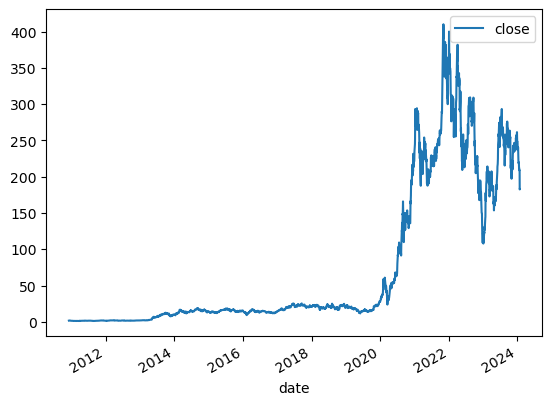

In [165]:
data.plot.line(y='close', use_index=True);

In [166]:
data['Tomorrow']=data['close'].shift(-1)

In [167]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
2010-12-06,2.090000,2.096667,1.970667,2.020667,19116000,2.104000
2010-12-07,2.032667,2.160000,2.003333,2.104000,19669500,2.158000
2010-12-08,2.165333,2.166000,2.101333,2.158000,9900000,2.136667
2010-12-09,2.167333,2.181333,2.110000,2.136667,6090000,2.101333
2010-12-10,2.136667,2.194667,2.075333,2.101333,6441000,2.036667


In [168]:
data.tail()

,open,high,low,close,volume,Tomorrow
date,,,,,,
2024-01-22,212.259995,217.800003,206.270004,208.800003,117952500,209.139999
2024-01-23,211.300003,215.649994,207.750000,209.139999,106605900,207.830002
2024-01-24,211.880005,212.729996,206.770004,207.830002,123369900,182.630005
2024-01-25,189.699997,193.000000,180.059998,182.630005,198076800,183.250000
2024-01-26,185.500000,186.779999,182.100006,183.250000,107063400,NaN


In [169]:
#create target
data['Target']= (data['Tomorrow']>data['close']).astype(int)

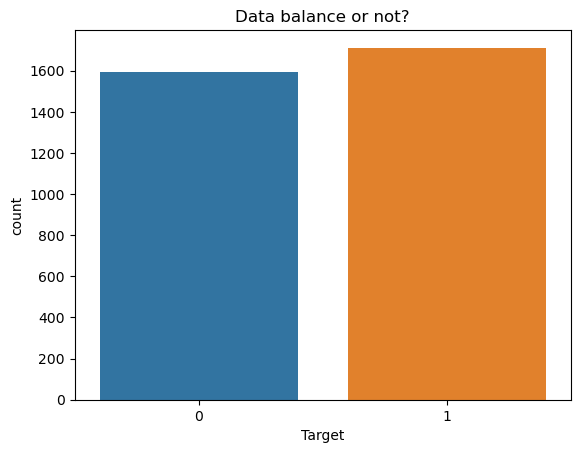

In [170]:
sns.countplot(data=data, x='Target');
plt.title('Data balance or not?');

In [171]:
data.head()

,open,high,low,close,volume,Tomorrow,Target
date,,,,,,,
2010-12-06,2.090000,2.096667,1.970667,2.020667,19116000,2.104000,1
2010-12-07,2.032667,2.160000,2.003333,2.104000,19669500,2.158000,1
2010-12-08,2.165333,2.166000,2.101333,2.158000,9900000,2.136667,0
2010-12-09,2.167333,2.181333,2.110000,2.136667,6090000,2.101333,0
2010-12-10,2.136667,2.194667,2.075333,2.101333,6441000,2.036667,0


In [172]:
train = data.iloc[:-200]
test = data.iloc[-200:]

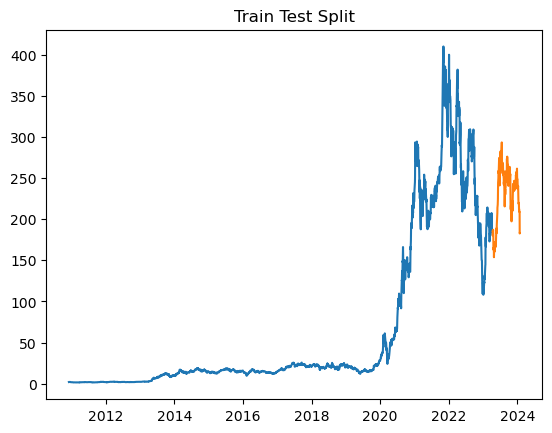

In [173]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [174]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    PRS = precision_score(y_true=y, y_pred=predicted)
   

    print('PRS: {:.2f}'.format(PRS))
    print()

In [175]:
predictors_2 = ["close", "volume", "open", "high", "low"]

In [176]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestClassifier(random_state=0),
          'xgboost': XGBClassifier(),'Gradient Boost': XGBClassifier(random_state=0),
    'Catboostregressor':CatBoostClassifier(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['Target'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['Target'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
PRS: 0.54

Performance of "xgboost" on Validation and Test set:
Test set:
****************
PRS: 0.58

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
PRS: 0.58

Learning rate set to 0.13809
0:	learn: 0.6920888	total: 4.46ms	remaining: 441ms
1:	learn: 0.6912870	total: 7.91ms	remaining: 388ms
2:	learn: 0.6906362	total: 11.8ms	remaining: 382ms
3:	learn: 0.6901251	total: 16ms	remaining: 385ms
4:	learn: 0.6897367	total: 19.1ms	remaining: 362ms
5:	learn: 0.6890549	total: 22ms	remaining: 344ms
6:	learn: 0.6887890	total: 25.1ms	remaining: 334ms
7:	learn: 0.6878346	total: 28.1ms	remaining: 323ms
8:	learn: 0.6872722	total: 31.6ms	remaining: 319ms
9:	learn: 0.6865655	total: 34.7ms	remaining: 312ms
10:	learn: 0.6858953	total: 37.6ms	remaining: 304ms
11:	learn: 0.6852758	total: 40.4ms	remaining: 297ms
12:	learn: 0.6847231	total: 43.7ms	remaining: 292ms
13:	learn: 0.6843796	tot

In [177]:
model= GradientBoostingClassifier()
model.fit(train[predictors_2], train['Target'])
pred= model.predict(test[predictors_2])

In [178]:
pred= pd.Series(pred, index=test.index)
combined= pd.concat([test['Target'], pred],axis=1)
combined.head(10)

,Target,0
date,,
2023-04-12,1,1
2023-04-13,0,1
2023-04-14,1,1
2023-04-17,0,1
2023-04-18,0,1
2023-04-19,0,1
2023-04-20,1,1
2023-04-21,0,1
2023-04-24,0,1


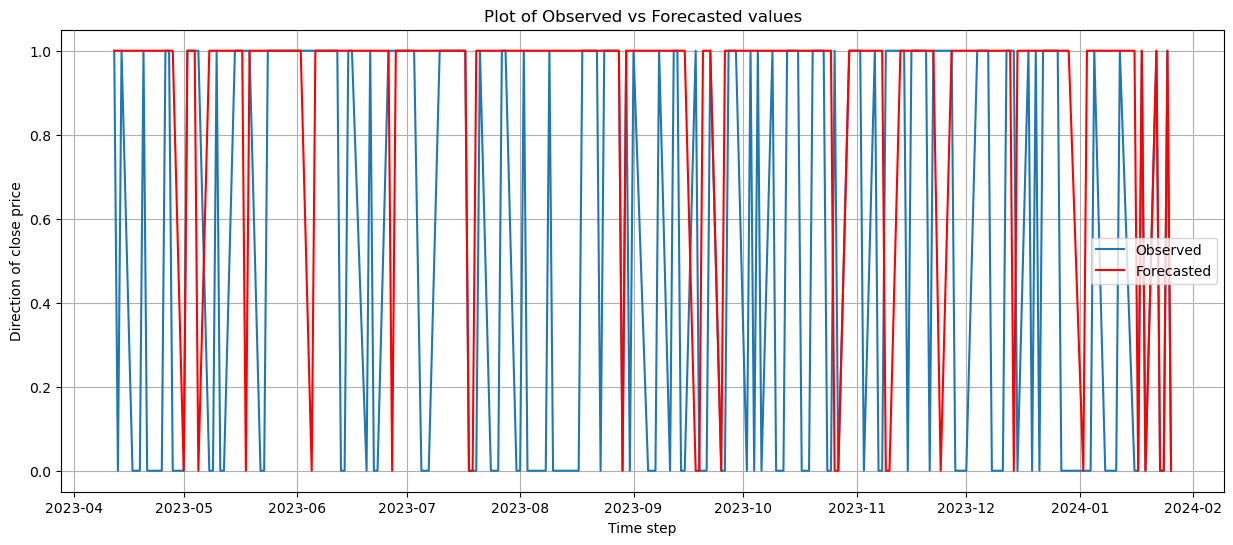

In [179]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['Target'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Direction of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
#plt.savefig('forcast.png')
plt.show()

In [180]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Target"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [181]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [182]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [183]:
data['RSI']= computeRSI(data['close'], 14)

In [184]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data['Target']=data['Target']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,Target
date,,,,,,,,,,,,,
2010-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020667,NaN,1
2010-12-07,1.020204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.104000,NaN,1
2010-12-08,1.012670,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.158000,NaN,0
2010-12-09,0.995033,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.136667,NaN,0
2010-12-10,0.991663,0.0,0.998669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.101333,NaN,0


In [185]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [186]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [187]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [188]:
new_data=new_data.dropna()
new_data.shape 

(2307, 17)

In [189]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,Target,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,,
2014-11-25,1.002769,2.0,1.005194,3.0,0.993890,30.0,1.145516,132.0,2.685848,522.0,16.539333,0.032848,1,16.390889,16.438333,6.153822,16.373393
2014-11-26,1.000705,2.0,1.006042,4.0,0.997473,31.0,1.144571,132.0,2.683337,522.0,16.562668,0.026909,0,16.516667,16.433833,6.164210,16.382626
2014-11-28,0.992048,1.0,0.993539,3.0,0.984470,30.0,1.124019,132.0,2.634960,521.0,16.301332,-0.026127,0,16.467778,16.462833,6.174317,16.378661
2014-12-01,0.972950,0.0,0.949804,3.0,0.935485,30.0,1.063112,131.0,2.490808,521.0,15.442667,-0.070092,0,16.102222,16.211500,6.183548,16.333002
2014-12-02,0.999547,0.0,0.960992,2.0,0.937836,29.0,1.060348,131.0,2.483212,521.0,15.428667,-0.080532,0,15.724222,15.933833,6.192748,16.288888


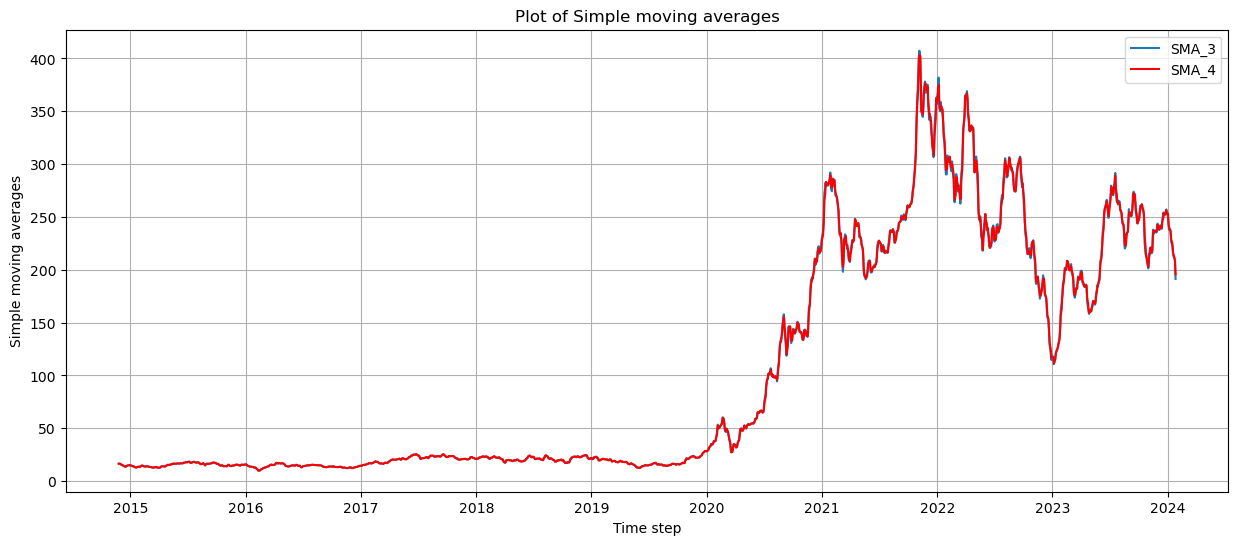

In [190]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

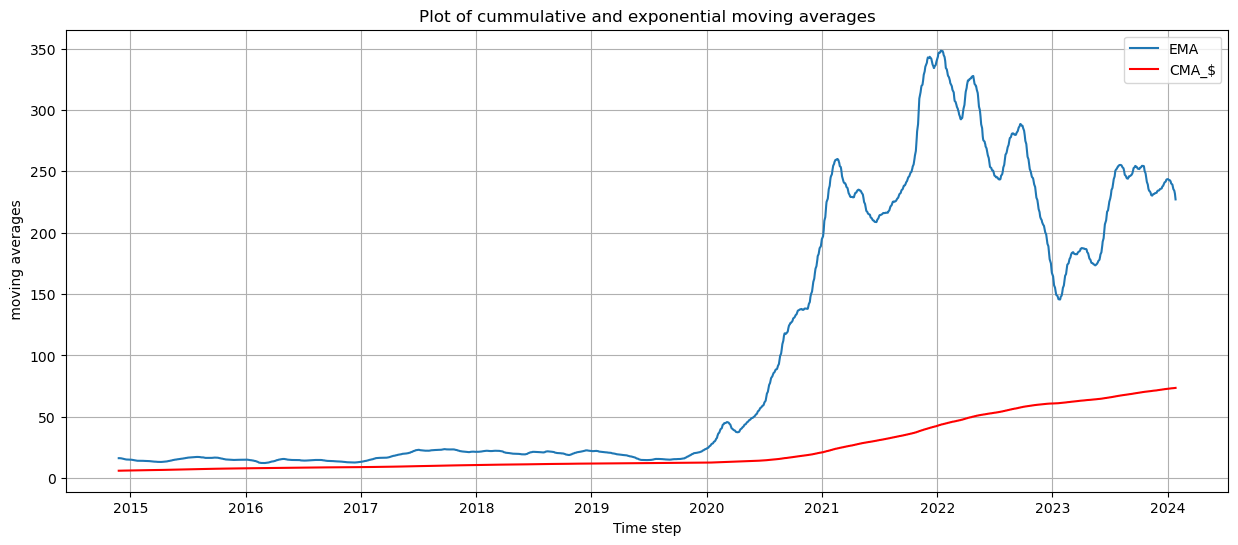

In [191]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

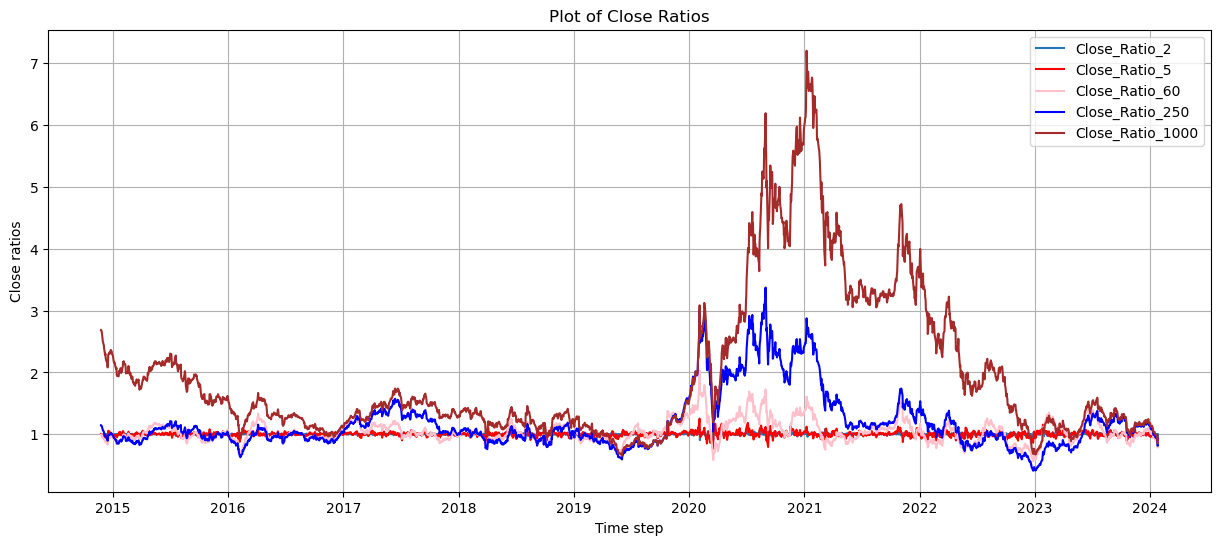

In [192]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

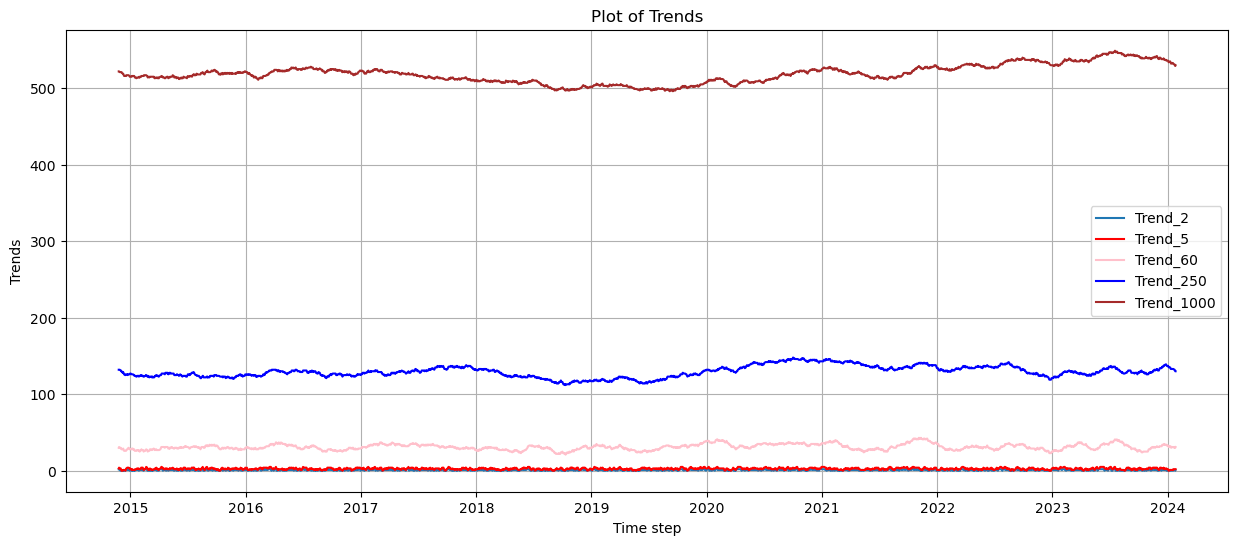

In [194]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Trends')
plt.ylabel('Trends')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [195]:
new_data['RSI']=data['RSI']

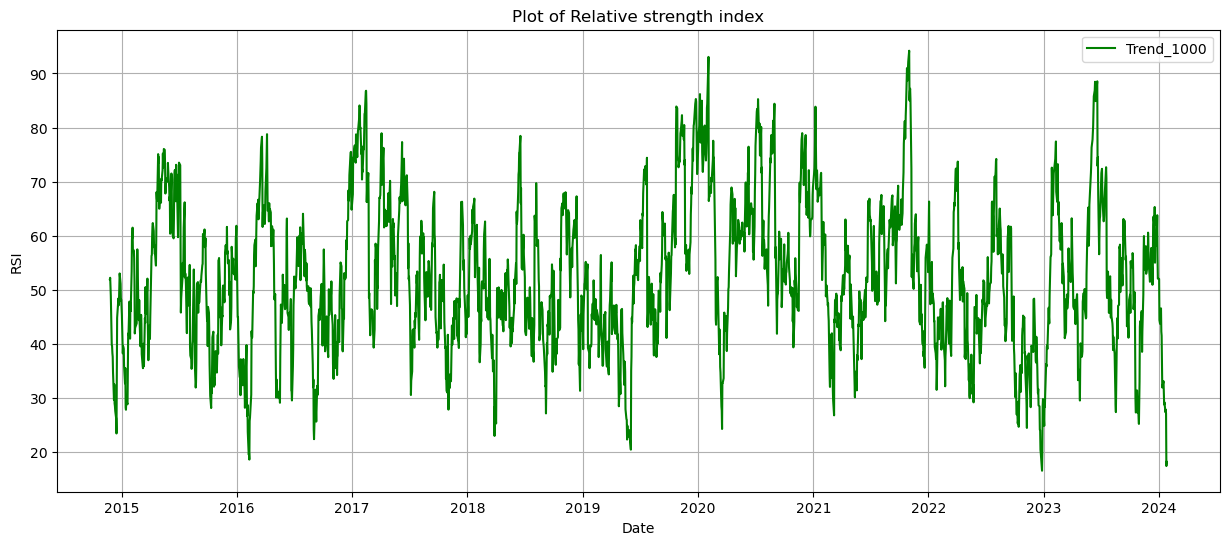

In [196]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

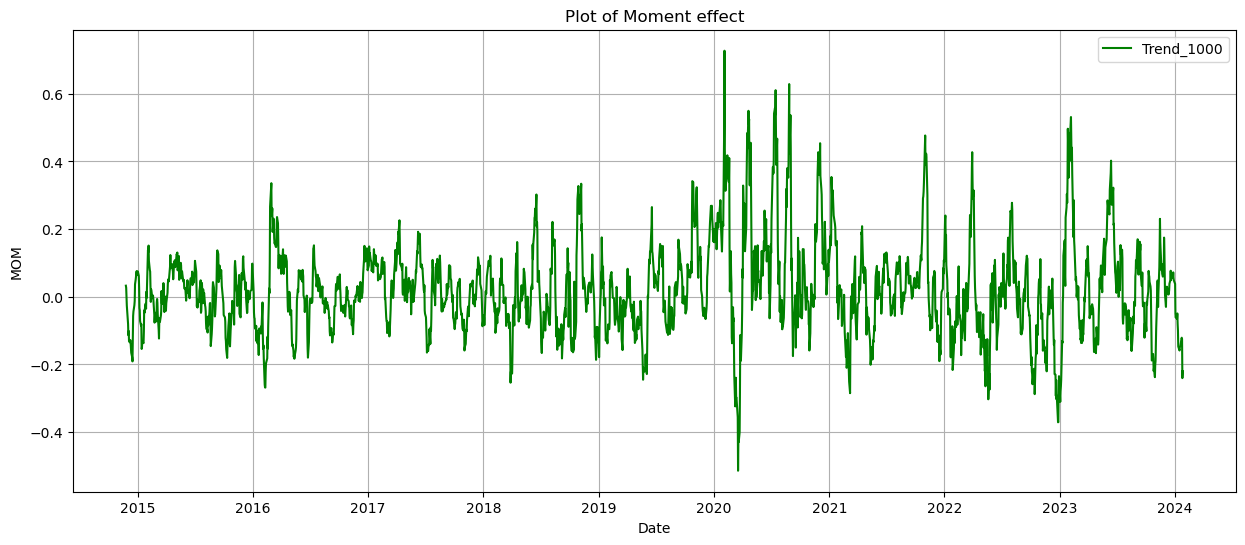

In [197]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [198]:
train = new_data.iloc[:-200]
test = new_data.iloc[-200:]

In [199]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'Target', 'SMA_3',
       'SMA_4', 'CMA_4', 'EMA', 'RSI'],
      dtype='object')

In [219]:
predictors_2= ['SMA_3','SMA_4','EMA','RSI','MOM'] 

#### Retrain the models on the new predictors

In [220]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestClassifier(random_state=0),
          'xgboost': XGBClassifier(),'Gradient Boost': XGBClassifier(random_state=0),
    'Catboostregressor':CatBoostClassifier(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['Target'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['Target'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
PRS: 0.54

Performance of "xgboost" on Validation and Test set:
Test set:
****************
PRS: 0.52

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
PRS: 0.52

Learning rate set to 0.116987
0:	learn: 0.6921552	total: 3.06ms	remaining: 303ms
1:	learn: 0.6912238	total: 6.34ms	remaining: 311ms
2:	learn: 0.6904488	total: 8.95ms	remaining: 289ms
3:	learn: 0.6893532	total: 11.4ms	remaining: 273ms
4:	learn: 0.6883637	total: 14ms	remaining: 267ms
5:	learn: 0.6872855	total: 16.7ms	remaining: 261ms
6:	learn: 0.6864248	total: 20.4ms	remaining: 272ms
7:	learn: 0.6857961	total: 23.1ms	remaining: 265ms
8:	learn: 0.6851098	total: 25.5ms	remaining: 258ms
9:	learn: 0.6842994	total: 28ms	remaining: 252ms
10:	learn: 0.6837091	total: 30.6ms	remaining: 247ms
11:	learn: 0.6831030	total: 33.2ms	remaining: 243ms
12:	learn: 0.6826309	total: 36.9ms	remaining: 247ms
13:	learn: 0.6824255	to

## Retrain the best performing model

In [221]:
model_1= GradientBoostingClassifier(random_state=0)

In [222]:
#create function for target 
def predict(train, test, predictors_2, model_1):
    model_1.fit(train[predictors_2], train["Target"])
    preds_1 = model_1.predict(test[predictors_2])
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_2")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1

In [223]:
#write a backtest function
def backtest(new_data, model_1, predictors_2, start=1500, step=250):
    all_predictions_1 = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_1 = predict(train, test, predictors_2, model_1)
        all_predictions_1.append(predictions_1)
    
    return pd.concat(all_predictions_1)

In [224]:
predictions= backtest(new_data, model_1, predictors_2)

In [225]:
predictions[:10] 

,Target,Predictions_2
date,,
2020-11-10,1,0
2020-11-11,0,0
2020-11-12,0,0
2020-11-13,0,0
2020-11-16,1,0
2020-11-17,1,0
2020-11-18,1,0
2020-11-19,0,0
2020-11-20,1,0


In [226]:
predictions['Predictions_2'].value_counts()

Predictions_2
0    514
1    293
Name: count, dtype: int64

In [227]:
precision_score(predictions["Target"], predictions["Predictions_2"]) 

0.5051194539249146

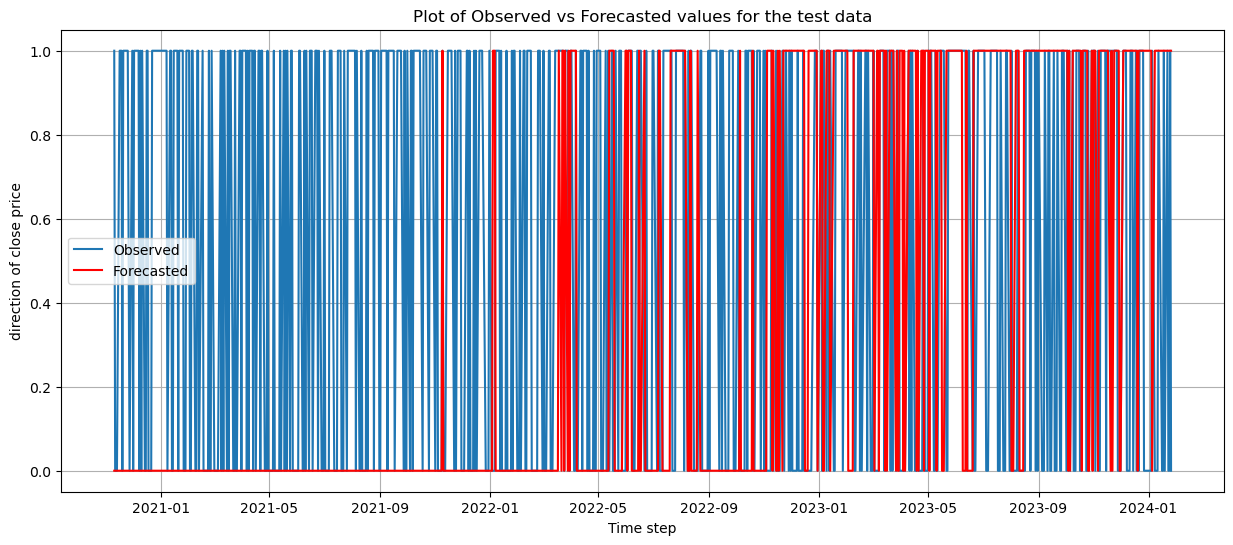

In [228]:
#Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions['Target'], label='Observed')
plt.plot(predictions['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values for the test data')
plt.ylabel('direction of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
#plt.savefig('forcast2.png')
plt.show()

In [229]:
model_1.fit(train[predictors], train['Target'])
prediction=model.predict(test[predictors])

In [230]:
precision_score(test["Target"], prediction) 

0.5325443786982249

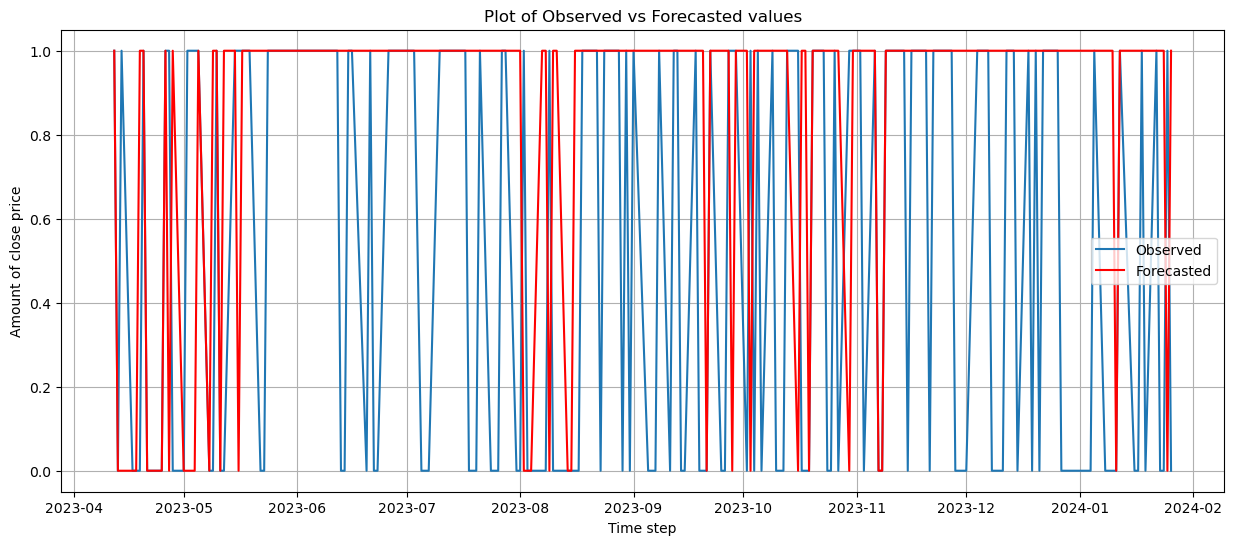

In [231]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['Target'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

In [ ]:
#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingClassifier(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [238]:
model = GradientBoostingClassifier(max_depth=10, n_estimators=100, learning_rate=0.02, min_samples_split=10)
model.fit(train[predictors], train['Target'])
prediction=model.predict(test[predictors])

In [239]:
precision_score(test["Target"], prediction) 

0.5419847328244275

In [240]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['Target'], pred],axis=1)
combined

,Target,0
date,,
2023-04-12,1,1
2023-04-13,0,1
2023-04-14,1,1
2023-04-17,0,1
2023-04-18,0,1
...,...,...
2024-01-22,1,0
2024-01-23,0,0
2024-01-24,0,0


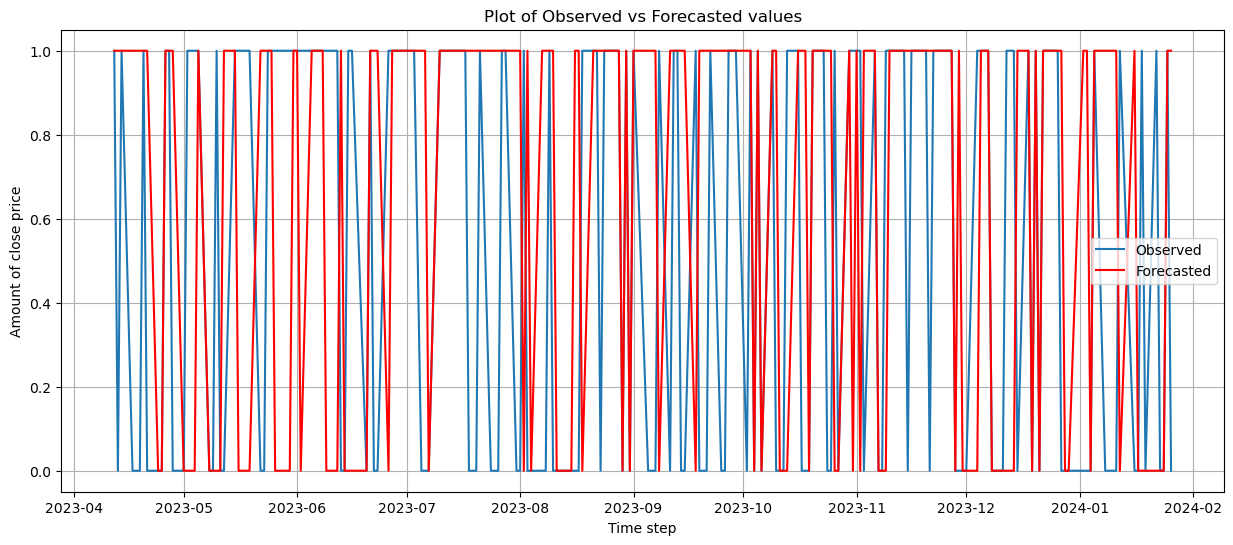

In [241]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['Target'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
#plt.savefig('forcast.png')
plt.show()

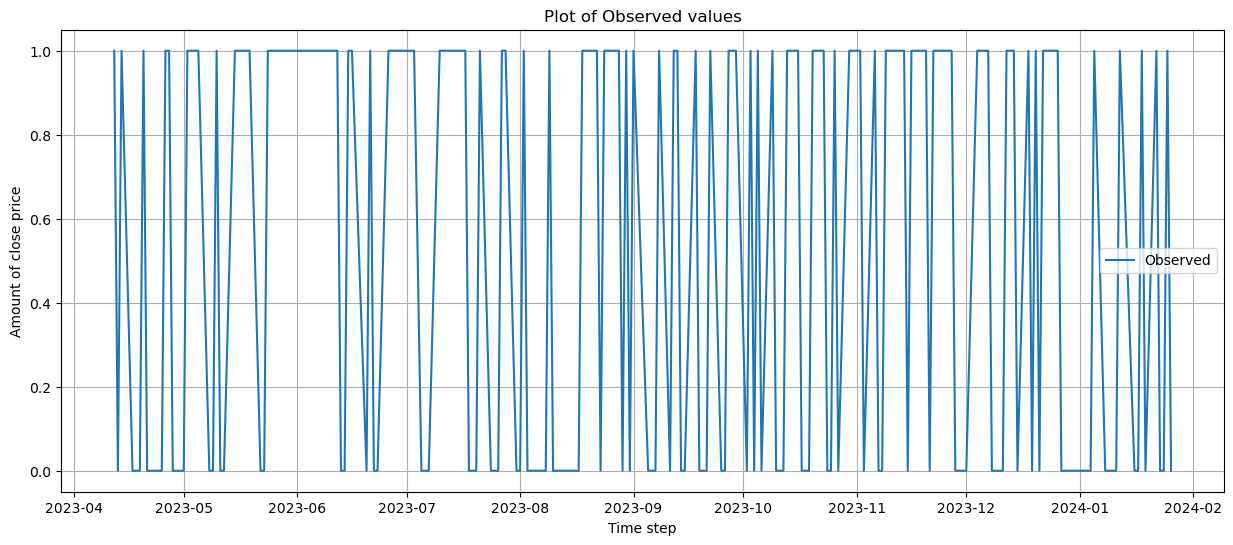

In [242]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['Target'], label='Observed')
#plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed values' )
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
#plt.savefig('forcast.png')
plt.show()

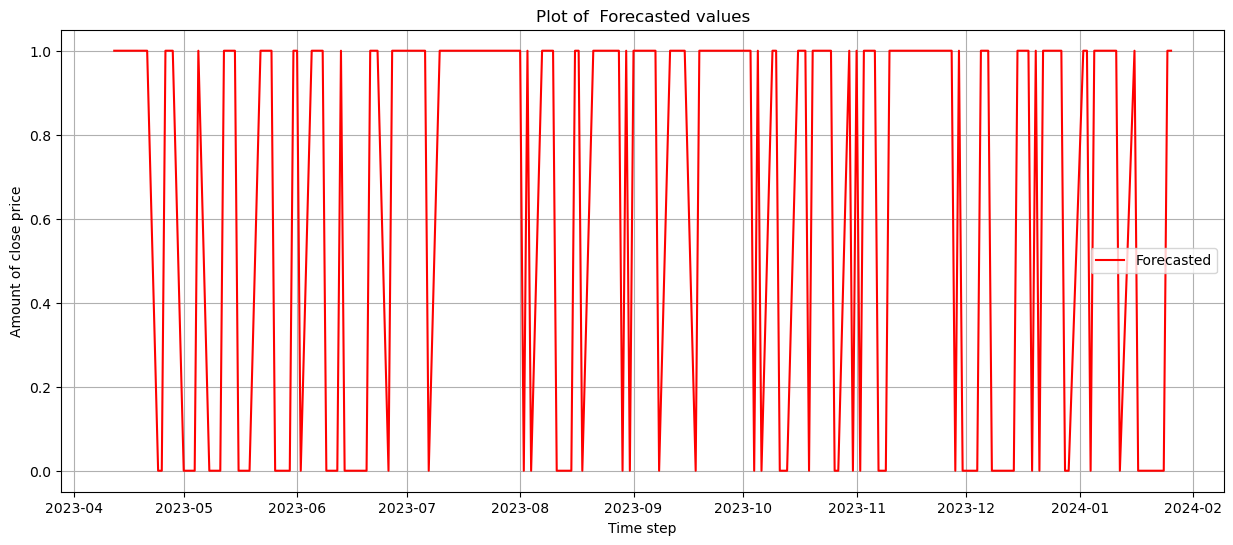

In [243]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
#plt.plot(combined['Target'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of  Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
#plt.savefig('forcast.png')
plt.show()